In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
#4

gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


In [3]:
#5

gdp_df.shape

(7176, 4)

In [4]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [5]:
type(gdp_df)

pandas.core.frame.DataFrame

This dataframe has 7176 rows and 4 columns. Country contains strings (or objects), Year is an integer, Value is a float, and Value Footnoes are also floats.

In [6]:
#6

gdp_drop = gdp_df.drop(columns = 'Value Footnotes')
# or gdp_df.drop(['Value Footnotes'], axis=1)
gdp_drop
# drop function has axis=0 as default (which refers to the rows not the columns)

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [7]:
gdp_drop.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df = gdp_drop

In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [9]:
#7

year_count = gdp_df.Country.value_counts()

In [10]:
type(year_count)

pandas.core.series.Series

In [11]:
year_df = year_count.to_frame().reset_index()
year_df

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [12]:
year_df.columns = ['Country', 'Number_of_Years']
year_df

,Country,Number_of_Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [13]:
year_df[year_df.Number_of_Years == year_df.Number_of_Years.max()]
# countries that have data for all 31 years

,Country,Number_of_Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


In [14]:
year_df[year_df.Number_of_Years <= 10]
# countries with 10 or less years of data

,Country,Number_of_Years
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8
241,Djibouti,8


In [15]:
country_count = gdp_df.Year.value_counts()

In [16]:
country_df = country_count.to_frame()
country_df

,Year
2018,242
2017,242
2016,242
2015,242
2014,242
2013,242
2019,241
2020,240
2012,240
2011,240


In [17]:
country_df = country_df.reset_index()

In [18]:
country_df.columns = ['Year', 'Countries_Counted']
country_df.sort_values(by = 'Countries_Counted', ascending=False)

,Year,Countries_Counted
0,2018,242
2,2016,242
3,2015,242
4,2014,242
5,2013,242
1,2017,242
6,2019,241
7,2020,240
8,2012,240
9,2011,240


Over 200 countries have data for all 31 years (although some rows don't have country names, so it may be less than 200). Only 4 countries had 10 years or less of recorded data. When sorting the years by countries counted, the trend is that more countries were recorded every year until hitting a plateau in 2013, then decreasing slightly after 2018.

In [19]:
#8

gdp_2020 = gdp_df[gdp_df.Year == 2020]

In [20]:
gdp_2020 = gdp_2020.reset_index(drop = True).drop(columns = 'Year')
gdp_2020

,Country,GDP_Per_Capita
0,Afghanistan,1970.560169
1,Africa Eastern and Southern,3491.978104
2,Africa Western and Central,4021.293919
3,Albania,13253.733337
4,Algeria,10735.382539
...,...,...
235,Vietnam,10338.270543
236,West Bank and Gaza,5402.538773
237,World,16269.969854
238,Zambia,3277.816510


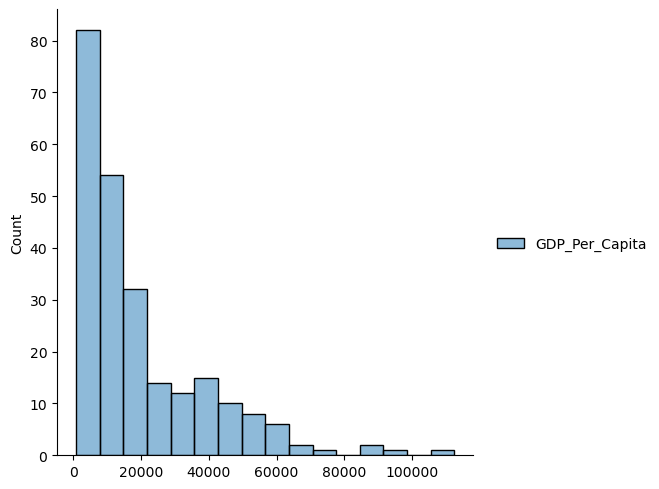

In [21]:
sns.displot(gdp_2020)

<Axes: ylabel='Density'>

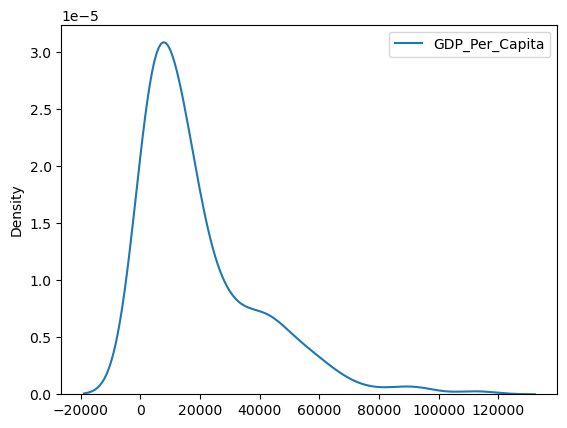

In [22]:
sns.kdeplot(gdp_2020)

<Axes: >

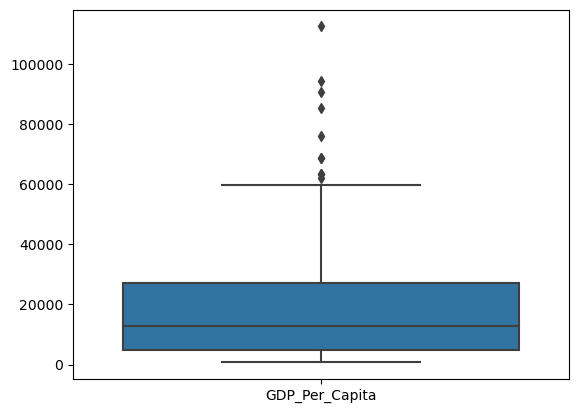

In [23]:
sns.boxplot(gdp_2020)

<Axes: >

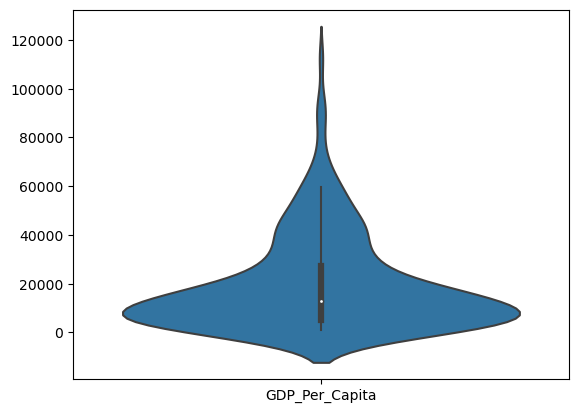

In [24]:
sns.violinplot(gdp_2020)

In [28]:
#9

round(np.median(gdp_2020.GDP_Per_Capita),2)

12908.94

$12,988.94 is the median GDP in 2020

In [36]:
#10

decades = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df[gdp_df.Year.isin(decades)] # .isin can be used to consolidate masks
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

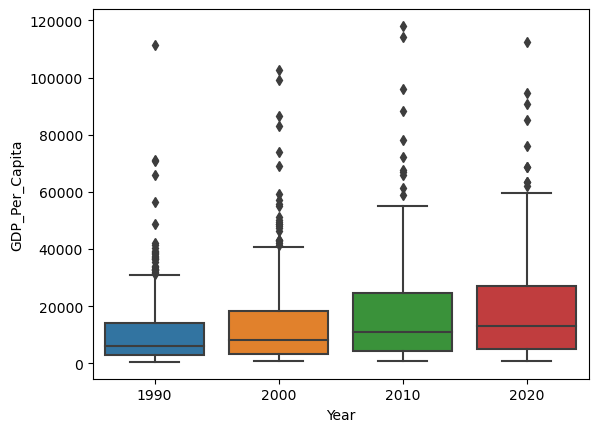

In [42]:
sns.boxplot(x = 'Year',
            y = 'GDP_Per_Capita',
            data = gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

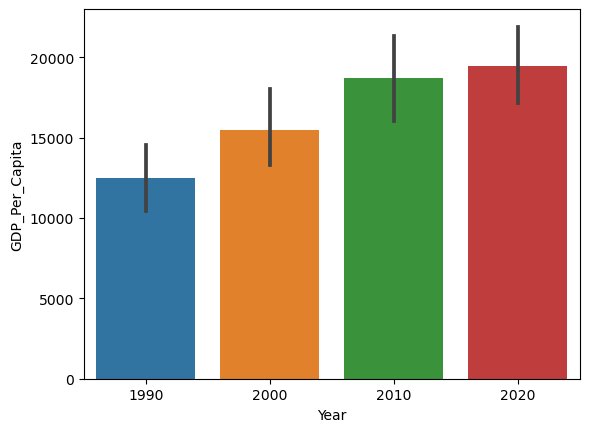

In [41]:
sns.barplot(x = 'Year',
            y = 'GDP_Per_Capita',
            data = gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

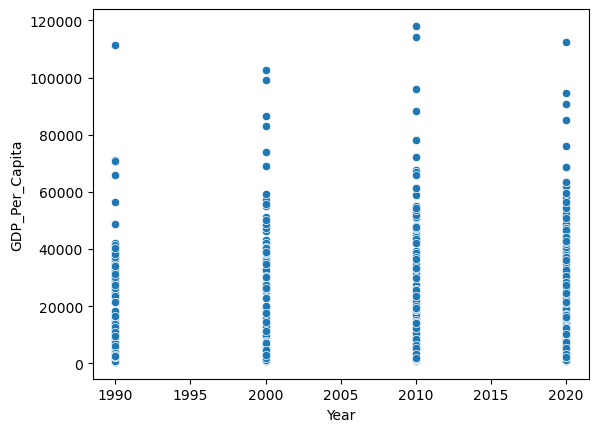

In [45]:
sns.scatterplot(x = 'Year',
                y = 'GDP_Per_Capita',
                data = gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

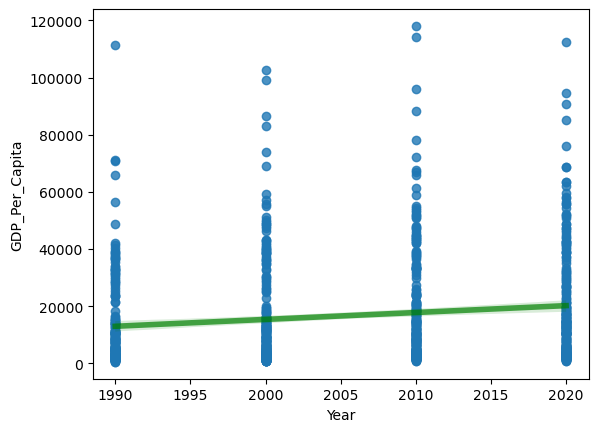

In [46]:
sns.regplot(x= 'Year', y = 'GDP_Per_Capita', data = gdp_decades, line_kws = {'color':'g', 'alpha': 0.7, 'lw':4})

Generally, the GDP increases over time. The maximum GDP every decade, however, varies. The bar chart is the most straightfoward, but doesn't show the outliers since it only shows average/median. The box chart gives a better of idea where the median is, but isn't as easy to interpret. The scatterplots show the outliers clearly, but everything else blurs together.

In [56]:
#11

gdp_chrono = gdp_df.sort_values(by = ['Year', 'Country'], ascending = True)
gdp_chrono = gdp_chrono.reset_index()
gdp_chrono

,index,Country,Year,GDP_Per_Capita
0,49,Africa Eastern and Southern,1990,3083.976800
1,80,Africa Western and Central,1990,2810.341129
2,111,Albania,1990,4827.034551
3,142,Algeria,1990,8746.340762
4,173,Angola,1990,5758.950488
...,...,...,...,...
7171,7025,Vietnam,2020,10338.270543
7172,7056,West Bank and Gaza,2020,5402.538773
7173,7083,World,2020,16269.969854
7174,7114,Zambia,2020,3277.816510


In [62]:
first_6fig = gdp_chrono.loc[gdp_chrono.GDP_Per_Capita >= 100000]
first_6fig = first_6fig.reset_index(drop = True)
first_6fig

,index,Country,Year,GDP_Per_Capita
0,6838,United Arab Emirates,1990,111454.055665
1,6837,United Arab Emirates,1991,106103.552655
2,6836,United Arab Emirates,1992,103470.924576
3,6834,United Arab Emirates,1994,100213.156226
4,6833,United Arab Emirates,1995,101570.992100
5,6832,United Arab Emirates,1996,102211.638844
6,6831,United Arab Emirates,1997,105108.996265
7,6830,United Arab Emirates,1998,100100.435658
8,6828,United Arab Emirates,2000,102494.714624
9,3901,Luxembourg,2001,101143.147977


The United Arab Emirates were the first to have a GDP per capita greater than $100,000.

In [65]:
#12

max_filter = (gdp_2020.GDP_Per_Capita == gdp_2020.GDP_Per_Capita.max())
gdp_2020_max = gdp_2020.loc[max_filter]
round(gdp_2020_max,2)

,Country,GDP_Per_Capita
130,Luxembourg,112557.31


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

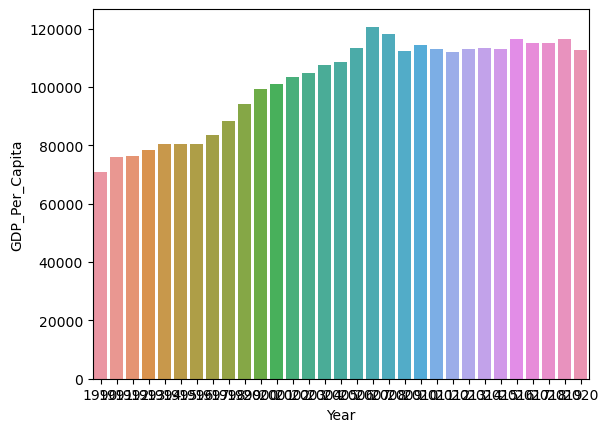

In [67]:
gdp_lux = gdp_df[gdp_df.Country == 'Luxembourg']
sns.barplot(x = 'Year', y = 'GDP_Per_Capita', data = gdp_lux)

Luxembourg had the highest GDP per capita in 2020. However, 2020 was not their highest year in total.

In [109]:
#13

min_filter = (gdp_2020.GDP_Per_Capita == gdp_2020.GDP_Per_Capita.min())
gdp_2020_min = gdp_2020.loc[min_filter]
gdp_2020_min

,Country,GDP_Per_Capita
30,Burundi,731.064074


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

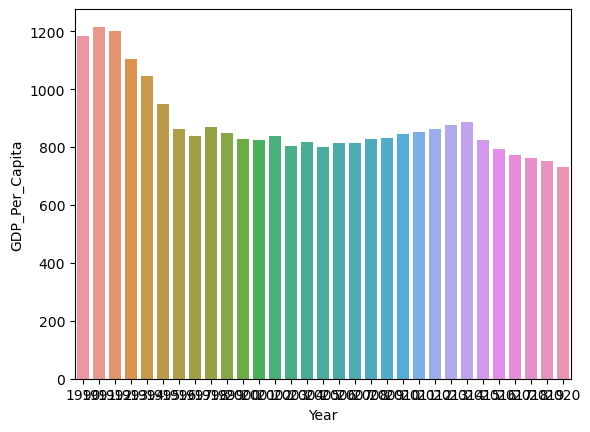

In [111]:
gdp_bur = gdp_df[gdp_df.Country == 'Burundi'].reset_index()
sns.barplot(x = 'Year', y = 'GDP_Per_Capita', data = gdp_bur)

Burundi had the lowest GP in 2020. Back in the 90's, it was considerably higher.

In [92]:
#13 Bonus

gdp_90 = gdp_df[gdp_df.Year == 1990].reset_index()
countries_90 = gdp_90.Country
countries_90

0      Africa Eastern and Southern
1       Africa Western and Central
2                          Albania
3                          Algeria
4                           Angola
                  ...             
201                        Vanuatu
202                        Vietnam
203                          World
204                         Zambia
205                       Zimbabwe
Name: Country, Length: 206, dtype: object

In [102]:
gdp_90_20 = gdp_df[gdp_df.Country.isin(countries_90) & gdp_df.Year.isin([1990,2020])]
gdp_90_20

,Country,Year,GDP_Per_Capita
19,Africa Eastern and Southern,2020,3491.978104
49,Africa Eastern and Southern,1990,3083.976800
50,Africa Western and Central,2020,4021.293919
80,Africa Western and Central,1990,2810.341129
81,Albania,2020,13253.733337
...,...,...,...
7113,World,1990,9704.621768
7114,Zambia,2020,3277.816510
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461


In [112]:
v = gdp_90_20.Country.value_counts()
gdp_90_20 = gdp_90_20[gdp_90_20.Country.isin(v.index[v.gt(1)])].reset_index() # answer found on stack overflow
# https://stackoverflow.com/questions/48628417/how-to-select-rows-in-pandas-dataframe-where-value-appears-more-than-once
gdp_90_20

,index,Country,Year,GDP_Per_Capita
0,19,Africa Eastern and Southern,2020,3491.978104
1,49,Africa Eastern and Southern,1990,3083.976800
2,50,Africa Western and Central,2020,4021.293919
3,80,Africa Western and Central,1990,2810.341129
4,81,Albania,2020,13253.733337
...,...,...,...,...
405,7113,World,1990,9704.621768
406,7114,Zambia,2020,3277.816510
407,7144,Zambia,1990,2190.181724
408,7145,Zimbabwe,2020,2134.555461


In [113]:
# come back to this later

In [127]:
#14

internet = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip', nrows = 4495,
                       dtype = {'Country or Area':object, 'Year':int, 'Value':float, 'Value Footnotes':object})
internet

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [131]:
internet.dtypes

Country or Area     object
Year                 int32
Value              float64
dtype: object

In [ ]:
#15

internet = internet.drop(columns = 'Value Footnotes')

In [132]:
internet.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [136]:
#16

internet_years = internet.Year.value_counts()
internet_years

1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: Year, dtype: int64

While the 2000's have more consistent internet usage among countries, 1990 was the peak in terms of countries using internet.

In [144]:
int_chrono = internet.sort_values('Year', ascending = True).reset_index(drop = True)
int_chrono = int_chrono[int_chrono.Internet_Users_Pct > 0].reset_index(drop = True)
int_chrono

,Country,Year,Internet_Users_Pct
0,United Kingdom,1990,0.087355
1,United States,1990,0.784729
2,Belgium,1990,0.001007
3,Spain,1990,0.012874
4,Denmark,1990,0.097277
...,...,...,...
4101,Costa Rica,2014,49.410000
4102,Mauritius,2014,41.440000
4103,Cote d'Ivoire,2014,14.600000
4104,Saint Kitts and Nevis,2014,65.400000


1990 was the first year where the was a non-zero percent in internet users.